<a href="https://colab.research.google.com/github/ITanmayee/wise_ml/blob/main/pima_indians_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/pima-indians-diabetes.csv')

In [ ]:
data.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
data.columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Class']
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    int64  
 1   Glucose                   767 non-null    int64  
 2   BloodPressure             767 non-null    int64  
 3   SkinThickness             767 non-null    int64  
 4   Insulin                   767 non-null    int64  
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    int64  
 8   Class                     767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


<Figure size 1440x1440 with 0 Axes>

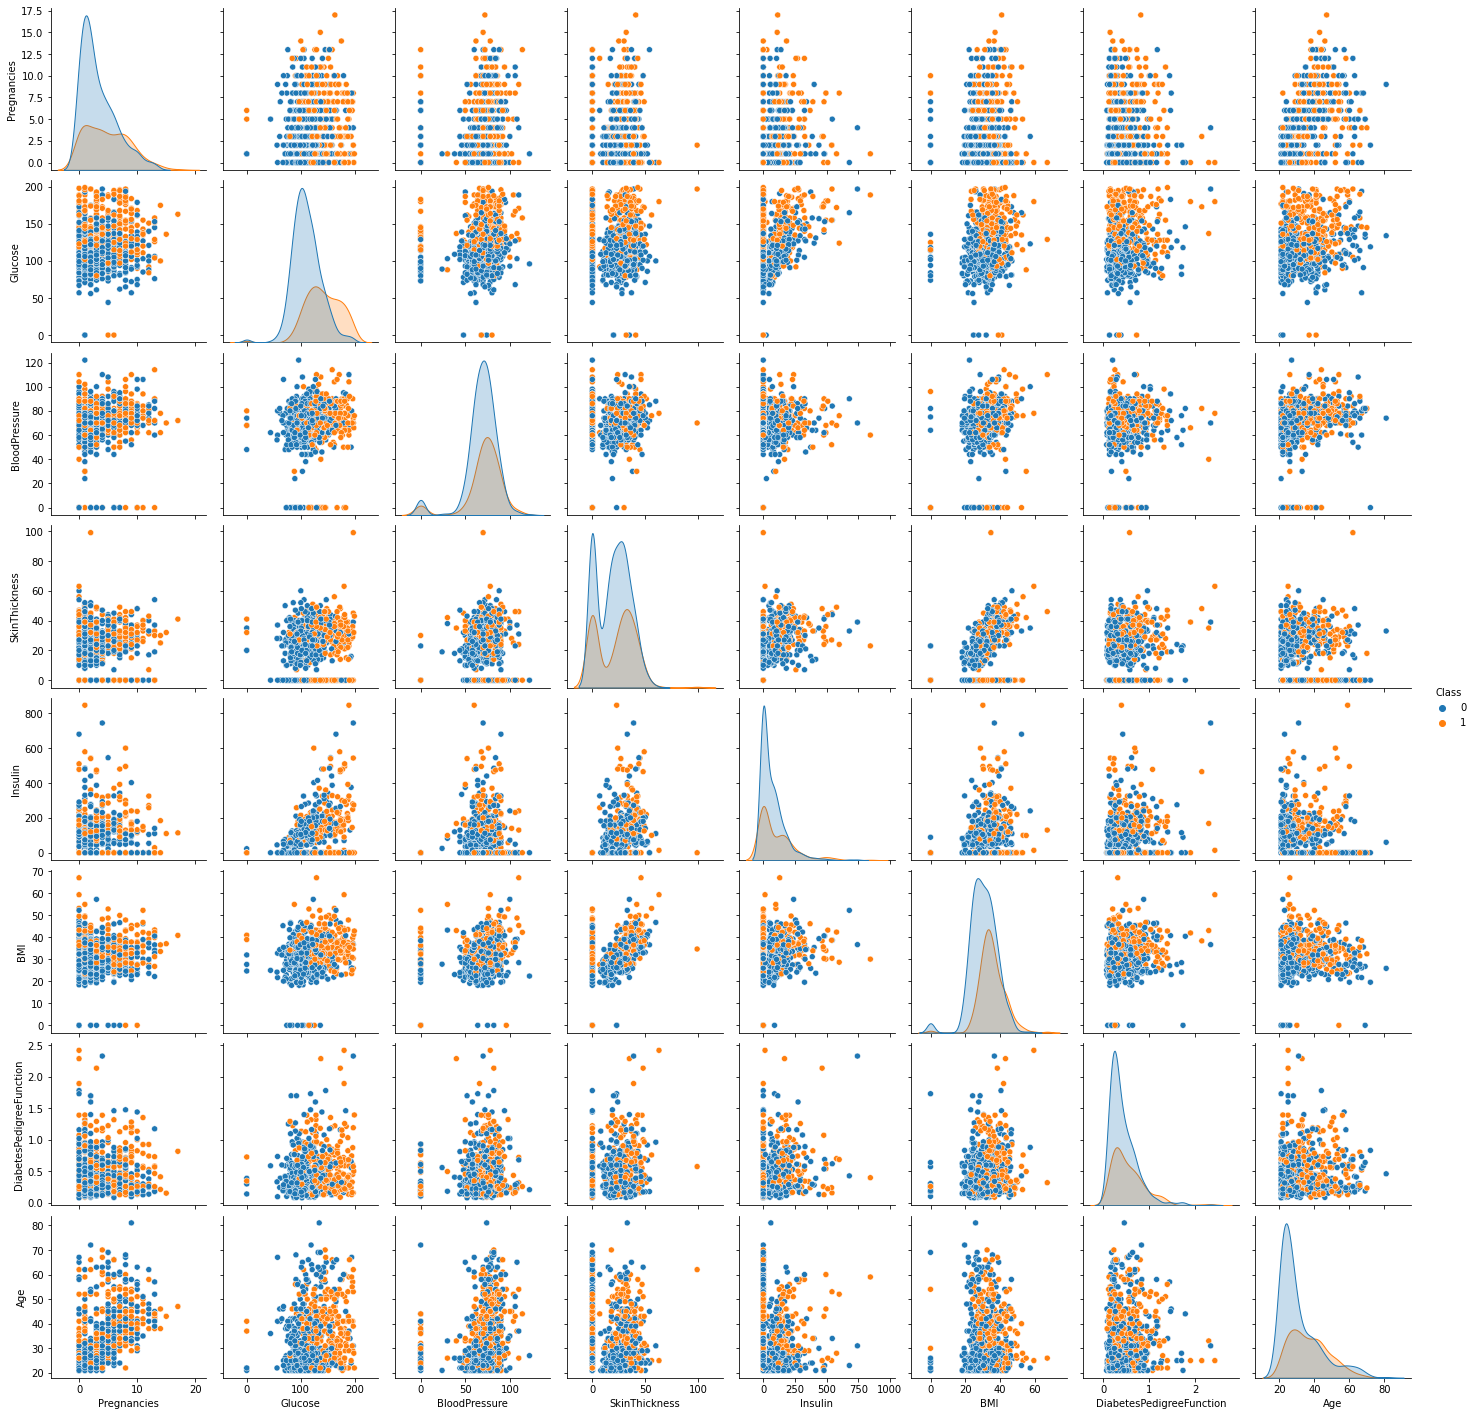

In [ ]:
plt.figure(figsize=(20, 20))
sns.pairplot(data, hue='Class')
plt.show()
plt.close()

In [ ]:
features = data.drop(['Class'], axis=1)
target = data['Class']

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=50)

Logistic regression

In [ ]:
logreg_model = LogisticRegression(max_iter=200)
logreg_model.fit(x_train, y_train)

train_pred = logreg_model.predict(x_train)
test_pred =  logreg_model.predict(x_test)

In [ ]:
print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 79.282%
Testing Accuracy: 71.429%


KNN

In [ ]:
k_range = range(1, 20)
train_acc = []
test_acc = []

for k in k_range:    
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(x_train, y_train)

    train_pred = knn_model.predict(x_train)
    test_pred =  knn_model.predict(x_test)

    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

print(train_acc)
print(test_acc)

[1.0, 0.8548123980424144, 0.8597063621533442, 0.8107667210440457, 0.7960848287112561, 0.7879282218597063, 0.7944535073409462, 0.7895595432300163, 0.7911908646003263, 0.7862969004893964, 0.7862969004893964, 0.7862969004893964, 0.7846655791190864, 0.7846655791190864, 0.7944535073409462, 0.7862969004893964, 0.7960848287112561, 0.7928221859706363, 0.7895595432300163]
[0.6493506493506493, 0.6948051948051948, 0.6558441558441559, 0.6948051948051948, 0.6948051948051948, 0.7077922077922078, 0.7077922077922078, 0.6948051948051948, 0.6883116883116883, 0.6623376623376623, 0.7142857142857143, 0.6623376623376623, 0.7012987012987013, 0.7142857142857143, 0.6948051948051948, 0.7012987012987013, 0.7012987012987013, 0.7142857142857143, 0.7077922077922078]


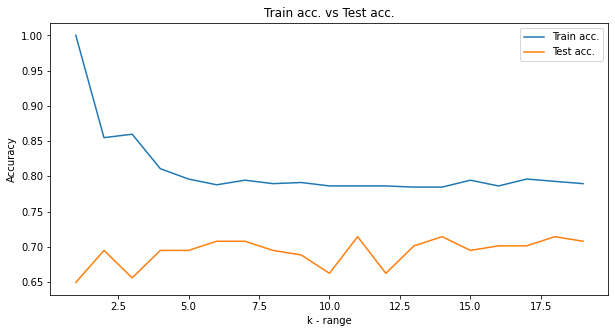

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_acc, label='Train acc.')
plt.plot(k_range, test_acc, label='Test acc.')
plt.legend()
plt.xlabel('k - range')
plt.ylabel('Accuracy')
plt.title('Train acc. vs Test acc.')
plt.show()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=20)
knn_model.fit(x_train, y_train)

train_pred = knn_model.predict(x_train)
test_pred =  knn_model.predict(x_test)

print(f"Training Accuracy: {accuracy_score(y_train, train_pred)*100:.3f}%")
print(f"Testing Accuracy: {accuracy_score(y_test, test_pred)*100:.3f}%")

Training Accuracy: 77.814%
Testing Accuracy: 71.429%
